In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame (iris.data,
                   columns = ["sl",
                              'sw',
                              "pl",
                              "pw"
                              ]
                              
                   )

df["tar"] =  iris.target







array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa5522a00>,
      dtype=object)

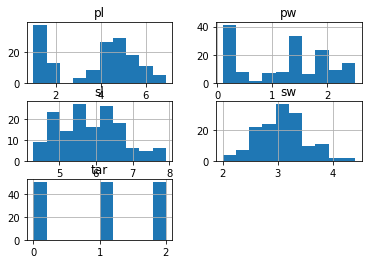

In [2]:
df.hist()

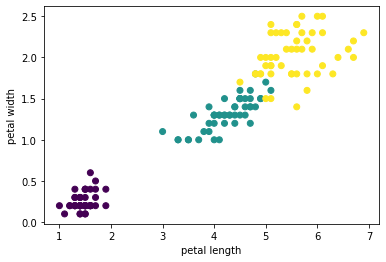

In [3]:
plt.scatter(y = df["pw"], x = df["pl"],
            c = df["tar"].values
            )

         
plt.xlabel("petal length")
plt.ylabel("petal width")
              
             
               
        

plt.show()

           

In [31]:
x  = df.drop(columns = ['sl', 
                        "sw",
                       "tar"])
y = df["tar"]
#ml  model has begun

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(
    x,y, random_state = 1,
    test_size = 0.25,
    stratify = y
    )


y_test.value_counts()

2    13
1    13
0    12
Name: tar, dtype: int64

In [5]:
#start now
knn = KNeighborsClassifier (
    n_neighbors = 5
    )

knn.fit(x_train, y_train)



KNeighborsClassifier()

In [6]:
pred = knn.predict_proba(x_test)

pred[23:]













array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

In [16]:
knn.score(x_test, y_test)
y_pred = knn.predict(x_test)

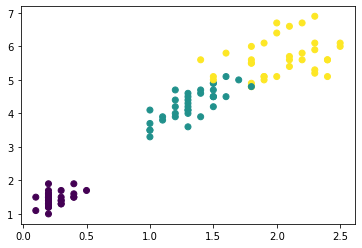

In [8]:
plt.scatter(x_train["pw"], 
           x_train["pl"],
            c = y_train
           )


In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print(confusion_matrix(y_test, y_pred))




[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


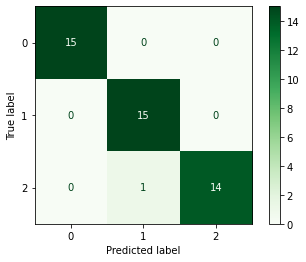

In [23]:
plot_confusion_matrix (knn,
                       x_test,
                       y_test,
                 
                 
       
                       cmap = plt.cm.Greens
                       )



In [30]:
knn_cv = KNeighborsClassifier(
n_neighbors = 3
)
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(
   knn_cv, x,y,cv = 10
    )
cvs


array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

In [12]:
from  sklearn.model_selection  import  GridSearchCV 

knn2 = KNeighborsClassifier()

knn_gscv = GridSearchCV(
    knn2 , {"n_neighbors":np.arange(2,10)},
    cv = 5
    )

knn_gscv.fit(x,y)

knn_gscv.best_params_

{'n_neighbors': 4}

In [37]:
model = KNeighborsClassifier(
    n_neighbors = 1


  
    )

model.fit(x,y)
model.score(x,y)


0.9933333333333333